# 處理 outliers
* 新增欄位註記
* outliers 或 NA 填補
    1. 平均數 (mean)
    2. 中位數 (median, or Q50)
    3. 最大/最小值 (max/min, Q100, Q0)
    4. 分位數 (quantile)

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# 如果欄位中有 NA, describe 會有問題 (pandas新版已將NAN排除後統計)
app_train['AMT_ANNUITY']

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
5         27517.5
6         41301.0
7         42075.0
8         33826.5
9         20250.0
10        21177.0
11        10678.5
12         5881.5
13        28966.5
14        32778.0
15        20160.0
16        26149.5
17        13500.0
18         7875.0
19        17563.5
20        21375.0
21        37561.5
22        32521.5
23        23850.0
24        12703.5
25        11074.5
26        27076.5
27        23827.5
28        57676.5
29         9000.0
           ...   
307481    19975.5
307482    34969.5
307483    16479.0
307484    35617.5
307485     9000.0
307486    18283.5
307487    31473.0
307488    13351.5
307489    23089.5
307490     9148.5
307491    31522.5
307492    43443.0
307493    37678.5
307494    46858.5
307495    23773.5
307496    16875.0
307497    12028.5
307498    52168.5
307499    12694.5
307500    35982.0
307501    11871.0
307502    10620.0
307503    17770.5
307504    16096.5
307505    

In [10]:
# Ignore NA, 計算五值
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in five_num]
print(quantile_5s)

[1615.5, 16524.0, 24903.0, 34596.0, 258025.5]


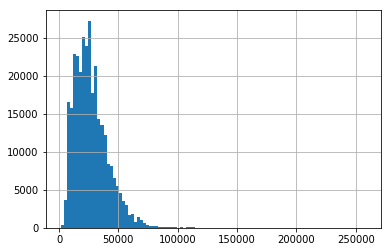

In [14]:
app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'].hist(bins = 100)
plt.show()

In [6]:
# 試著將 max 取代為 q99
app_train[app_train['AMT_ANNUITY'] == app_train['AMT_ANNUITY'].max()] = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 99)

In [16]:
five_num = [0, 25, 50, 75, 100]
quantile_5s = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in five_num]
print(quantile_5s)

[1615.5, 16524.0, 24903.0, 34596.0, 258025.5]


In [17]:
# 得到 median 的另外一種方法
np.median(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])

24903.0

In [18]:
# 計算眾數 (mode)
from scipy.stats import mode
import time

start_time = time.time()
mode_get = mode(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])
print(mode_get)
print("Elapsed time: %.3f secs" % (time.time() - start_time))

ModeResult(mode=array([9000.]), count=array([6385]))
Elapsed time: 4.398 secs


In [19]:
# 計算眾數 (mode)
# 較快速的方式
from collections import defaultdict

start_time = time.time()
mode_dict = defaultdict(lambda:0)

for value in app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY']:
    mode_dict[value] += 1
    
mode_get = sorted(mode_dict.items(), key=lambda kv: kv[1], reverse=True)
print(mode_get[0])
print("Elapsed time: %.3f secs" % (time.time() - start_time))

(9000.0, 6385)
Elapsed time: 0.223 secs


In [21]:
mode_dict.items()

dict_items([(24700.5, 13), (35698.5, 162), (6750.0, 2279), (29686.5, 6), (21865.5, 245), (27517.5, 149), (41301.0, 24), (42075.0, 66), (33826.5, 65), (20250.0, 1345), (21177.0, 38), (10678.5, 83), (5881.5, 26), (28966.5, 19), (32778.0, 31), (20160.0, 62), (26149.5, 25), (13500.0, 5514), (7875.0, 741), (17563.5, 228), (21375.0, 248), (37561.5, 20), (32521.5, 148), (23850.0, 331), (12703.5, 40), (11074.5, 220), (27076.5, 151), (23827.5, 16), (57676.5, 109), (9000.0, 6385), (24592.5, 376), (25033.5, 110), (20893.5, 31), (39069.0, 120), (32895.0, 564), (44509.5, 29), (23157.0, 50), (15151.5, 58), (17338.5, 233), (27000.0, 681), (35028.0, 73), (29196.0, 89), (16258.5, 83), (42970.5, 19), (48280.5, 4), (17649.0, 29), (26838.0, 81), (37255.5, 204), (49927.5, 82), (34596.0, 240), (14661.0, 148), (16164.0, 358), (32472.0, 360), (45558.0, 3), (15381.0, 24), (12375.0, 1339), (27265.5, 19), (46899.0, 40), (86989.5, 1), (44118.0, 7), (40189.5, 78), (10462.5, 77), (9679.5, 23), (40657.5, 93), (43983

In [20]:
mode_dict

defaultdict(<function __main__.<lambda>>,
            {24700.5: 13,
             35698.5: 162,
             6750.0: 2279,
             29686.5: 6,
             21865.5: 245,
             27517.5: 149,
             41301.0: 24,
             42075.0: 66,
             33826.5: 65,
             20250.0: 1345,
             21177.0: 38,
             10678.5: 83,
             5881.5: 26,
             28966.5: 19,
             32778.0: 31,
             20160.0: 62,
             26149.5: 25,
             13500.0: 5514,
             7875.0: 741,
             17563.5: 228,
             21375.0: 248,
             37561.5: 20,
             32521.5: 148,
             23850.0: 331,
             12703.5: 40,
             11074.5: 220,
             27076.5: 151,
             23827.5: 16,
             57676.5: 109,
             9000.0: 6385,
             24592.5: 376,
             25033.5: 110,
             20893.5: 31,
             39069.0: 120,
             32895.0: 564,
             44509.5: 29,
    

## 連續值標準化
### 1. Z-transform: $ \frac{(x - mean(x))}{std(x)} $
### 2. Range (0 ~ 1): $ \frac{x - min(x)}{max(x) - min(x)} $
### 3. Range (-1 ~ 1): $ (\frac{x - min(x)}{max(x) - min(x)} - 0.5) * 2 $

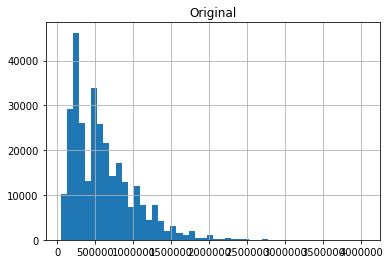

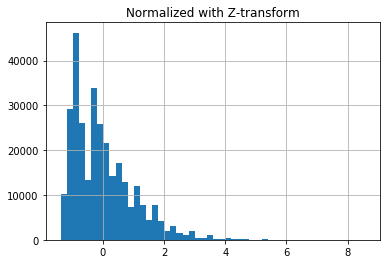

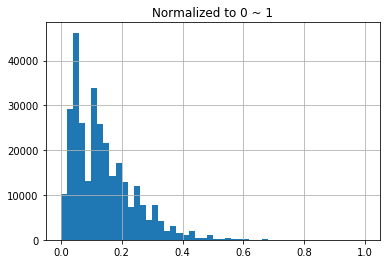

In [22]:
# 以 AMT_CREDIT 為例
app_train['AMT_CREDIT'].hist(bins = 50)
plt.title("Original")
plt.show()
value = app_train['AMT_CREDIT'].values

app_train['AMT_CREDIT_Norm1'] = ( value - np.mean(value) ) / ( np.std(value) )
app_train['AMT_CREDIT_Norm1'].hist(bins = 50)
plt.title("Normalized with Z-transform")
plt.show()

app_train['AMT_CREDIT_Norm2'] = ( value - min(value) ) / ( max(value) - min(value) )
app_train['AMT_CREDIT_Norm2'].hist(bins = 50)
plt.title("Normalized to 0 ~ 1")
plt.show()

# It's your turn
### 1. 列出 AMT_ANNUITY 的 q0 - q100
### 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補
### 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間
### 3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補
